<a href="https://colab.research.google.com/github/taylan-sen/CIS490a_intro_ai/blob/main/AI_NLP_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Assignment

This assignment should be completed in your own copy of this notebook and submitted as an ipynb. (Those of you who were in class for the relevant lessons can cut and paste from your class notes notebooks into this notebook. If you missed class, you can use your friend's notes, but YOU MUST NOT CUT AND PASTE SOMEONE ELSE'S CODE.)  

This assignment covers the three language models we learned:
* [Bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model)
* [N-Gram](https://en.wikipedia.org/wiki/Word_n-gram_language_model) \(using [nltk](https://www.nltk.org)\)
* [Word2Vec](https://en.wikipedia.org/wiki/Word2vec) \(using [gensim](https://pypi.org/project/gensim/)\)


## Part I. Bag of Words
1. Create two bags of words:
  * comp_words
    * manually create a python list called ***comp_words*** which is a list of words that are specific to the computer field.
  * hosp_words
    * similarly create a python list called ***hosp_words*** for words specific to the hospitality industry (i.e. hotel, restaurants, tourism, etc.)
  * Make sure each list has at least 15 words.
1. Evaluate two websites with these bags of words:
  1. Make sure you know how to create multiline strings in python (https://www.w3schools.com/python/gloss_python_multi_line_strings.asp)
  1. Create two strings called cis_website_str, and hotel_website_str:
    * each string should hold the ***text-only*** contents of the NU CIS and Hotel and Restaurant Management websites respectively. NOTE: You can get the text-only contents of a website by opening the website in your browser and selecting all (ctrl-a or cmd-a). The links of the departments are given below:
      * https://www.niagara.edu/hotel-and-restaurant-management/
      * https://www.niagara.edu/computer-and-information-sciences/
 1. Count and print the number of words each website has in each bag of words model. (You should have four separate counts.)
 1. Divide and print each of the above counts by the total number of words in its corresponding website string (i.e. len(cis_website_str) or len(hotel_website_str).
 1. Write a few sentences reflecting on what these counts mean. Be sure to talk about any limitations, including the consequences of having a different number of words in each bag of words.




## Part II. N-grams with nltk

Execute the code cells below answering questions in the text cells as you go along.

In [ ]:
from nltk.util import ngrams
help(ngrams)

In [ ]:
sent = "when the purple eagle soared, I know the purple eagles were the best"
bigrams = list(ngrams(sent.split(), 2))
for i in bigrams:
  print(i)

QUESTION:
In your own words, describe what the ngrams function does?  
Is it possible to create triples of words (aka trigrams)? If so, give the python code for it.

In [ ]:
# tokenize
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
word_tokenize(sent)

QUESTION: What is the data type that word_tokenize takes as input, and what is the data type that it returns?

In [ ]:
from nltk import FreqDist
f1dist = FreqDist(word for word in word_tokenize(sent))
print(f1dist['the'])

In [ ]:
f1dist.most_common()

In [ ]:
f2dist = FreqDist(bigrams)
f2dist.most_common()

In [ ]:
nltk.download('gutenberg')
from nltk.corpus import gutenberg
print(gutenberg.readme())
#nltk.download('reuters')
#from nltk.corpus import reuters
#print(reuters.readme())


In [ ]:
#sents = reuters.sents()
sents = gutenberg.sents('melville-moby_dick.txt')
print(type(sents))
#print(help(sents))
print(sents[64])

QUESTION:  
What type of data is stored in the Gutenberg corpus?  
Look at several different sentences. Do you see any issues with creating unigrams and bigrams directly from the sents data?

In [ ]:
unigrams = []
bigrams = []
for sent in sents:
  unigrams += sent
  bigrams += list(ngrams(sent, 2))
f1dist = FreqDist(unigrams)
f2dist = FreqDist(bigrams)
print(f1dist)
print(f2dist)

QUESTION:  
* How many different "words" are in Moby Dick?  
* Using these words, how many different two word phrases can be produced?  
* How many different two word phrases are there in Moby Dick?  

In [ ]:
help(f1dist.most_common)

In [ ]:
print(f1dist)
print(f1dist.most_common(10))
print('------------')
print(f2dist.most_common(10))
#f2dist.most_common()


QUESTION  
What is the problem with the most common unigrams and bigrams? (That is, if we want to use the bigrams and trigrams to understand the semantic content of the text, what is problematic with the way things are in the data?)

In [ ]:
# Lets remove "low meaning" words from the text
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
removal_list = list(stop_words)
removal_list += ['"','"','-',"'",",",'—','lt','rt', '&', ';',',"','!', '--', '?']
removal_list

In [ ]:
# Re-generate unigrams and bigrams
unigrams=[]
bigrams=[]
for sent in sents:
  sent_new = []
  for word in sent:
    word_lower = word.lower()
    if (word == '.') or (word_lower in removal_list):
      continue
    else:
      sent_new.append(word_lower)
  unigrams.extend(sent_new)
  bigrams.extend(list(ngrams(sent_new, 2)))
f1dist = FreqDist(unigrams)
f2dist = FreqDist(bigrams)
print(f1dist)
print(f2dist)

In [ ]:
print(f1dist.most_common(5))
print(f2dist.most_common(10))

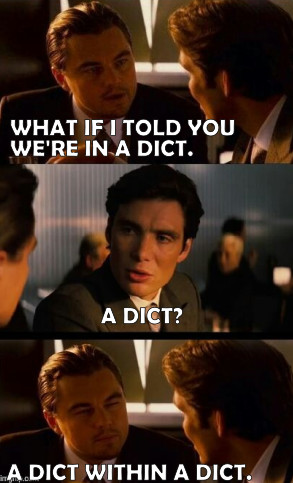

In [ ]:
# Use a dict within a dict to allow us to calculate next word statistics.
d = {}  # d{prefix:{suffix:count}} is a dict within a dict
for prefix, suffix in f2dist:
  if prefix in d:
    d[prefix][suffix] = f2dist[prefix,suffix]
  else:
    d[prefix] = {suffix:f2dist[prefix,suffix]}
d['captain']

Note that above, calling dict d with the key "captain" (i.e. d["captain"]) returns all the words that follow "captain" in Moby Dick, along with the count of the number of times they directly follow "captain".  
* What word follows "captain" most often?  
* Use dict d over and over to create "the most probable" ten word sentence that starts with "captain" relying only on bigram statistics.   


##Word2Vec

* we first import gensim and then load a pretrained word2vec model created from a google news corpus


In [ ]:
# This load takes almost 10 minutes.
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [ ]:
import numpy as np
import math

def cossim(a,b):
  """Function for Cosine Similarity.
  Given two vectors a and b, returns a measure of how similar
  they are. 0 = very different (i.e. orthogonal); 1 = very similar (parallel).
  """
  return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

king = wv['king']
man = wv['man']
woman = wv['woman']
queen = wv['queen']
queen_prediction = king-man+woman


actor = wv['actor']
man = wv['man']
woman = wv['woman']
actress = wv['actress']
actress_prediction = actor-man+woman

print('queen_prediction, queen', cossim(queen,queen_prediction))
print('king, queen', cossim(queen,king))
print('king, man', cossim(man,king))
print('king, woman', cossim(woman,king))
print('woman, man', cossim(woman,man))
print('man/2, man', cossim(man/2,man))
print('man+1, man', cossim(man+1,man))

print('actress_prediction, actress', cossim(actress_prediction,actress))
print('actor, actress', cossim(actor,actress))
print('actor, man', cossim(man,actor))
print('actor, woman', cossim(woman,actor))

For each of the print statements above, briefly write down:
* what you expect to see
* whether this is what you see
* an explanation